# Особенности:
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.

Расшифровка аббревиатур рейтинга ESBR.

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «K-A» - «Для широкой аудитории» (Это рейтинг использовался до 1998 года, потом был переименован в «E»)
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

# Знакомство с данными

Импортируем все необходимые библиотеки которые нужны или могут понадобиться.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Прочитаем файл и изучим его общую инфу.

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.sample(5, random_state=4)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9699,Disney's PK: Out of the Shadows,PS2,2002.0,Platform,0.06,0.05,0.00,0.02,49.0,5,E
11691,Katekyoo Hitman Reborn! DS: Flame Rumble Kaien...,DS,2007.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN
2444,Burnout 2: Point of Impact,PS2,2002.0,Racing,0.42,0.32,0.00,0.11,86.0,8.2,E
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
5894,Dynasty Warriors 8: Xtreme Legends,PS4,2014.0,Action,0.09,0.11,0.06,0.04,NaN,NaN,NaN


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим, что мin год у нас 1980, а max 2016. В других колонках данные тоже в нормальных пределах, аномалий нет.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

# Вывод

После того как прочитали файл мы видим следующее:
- Видим пропуски в таблице.
- Видим столбцы с разным регистром в названии.
- Видим у столбца "User_Score" тип данных object когда там числа.
- Видим в столбцах числа с плавающей точкой.

## Предобработка данных.

Приведем название столбзов к нижнему регистру.

In [7]:
df.columns = df.columns.str.lower()

Будем заменять пропуски в данных. Посмотрим на столбец name.

In [8]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

ДУбликатов в этой таблице нет. Образование пропусков полностью случайные, т.к. вероятность встретить такой пропуск не зависит от других значений. Можно конечно заменить пропуски на 0 и unknown, но я удалю эти 2 строчки т.к. среди всех строк это меньше 1%, а среди платформы GEN это примерно 7% и данных у этих строк нет, значит удаляя эти строки я не теряю особо информацию. Правильно конечно было бы запросить инфу у тех кто выгружал данные.

In [11]:
df.dropna(subset=['name'], inplace=True)

In [12]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

Изменим типы данных. Но прежде чем изменить тип данных разберем проблему в столбце "user_score", точнее оценку пользователей "tbd". TBD - в скором времени анонсируют. Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется.  

Имея эту инфу можно сделат вывод, что игра еще не анонсирована и знчаит можно заменить эти значения на NaN, так как нам надо перевести тип данных в этом столбце на числа. Сделаю еще й столбец который сохранит в этих стоках значение "tbd" для того, чтобы значть какие игры были еще не анонсированы, вдруг эта инфа пригодится.

0 означает, что игра не анонсирована и у нее еще нет рейтинга.

In [13]:
def new_table(df):
    if df['user_score'] == 'tbd':
        return 'tbd'
    return 'announced'

In [14]:
df['games_announced'] = df.apply(new_table, axis=1)

Теперь заменим "tbd" на NaN, т.к. игра еще не вышла и там будет пустое значение.

In [15]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
games_announced    0.000000
dtype: float64

In [16]:
df.user_score = df.user_score.replace('tbd', np.nan)

В столбце "year_of_release" пропуски заменять не будем, т.к. даных с пропусками меньше 1% и результат это не повлияет.  
Изменим тип данных в "user_score" на число с плавающей точкой. Остальное оставим без изменения.

In [17]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

Остались пропуски.

Пропусков в "critic_score" 51%. Если их заменить на среднее или медиану, то это сильно отразится на результате. По этому раз там нет значения, значит так и оставим, что бы не искажать данные.
Тоже сделаем и для "user_score" и столбца "rating".

Подсчитаем суммарные продажи.

In [18]:
df['all_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

Посмотрим на рейтинг ESBR

In [19]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видим рейтинг "К-А", его заменили на рейтинг "Е" после 1998 года. Посмотрим сколько игр с этим рейтингом.

In [20]:
df[df.rating == "K-A"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,games_announced,all_sales
656,Theme Hospital,PC,1997.0,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A,announced,2.40
903,PaRappa The Rapper,PS,1996.0,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A,announced,1.91
16681,Worms 2,PC,1997.0,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A,announced,0.01


Видно, что рейтинг игр "К-А" всего 3 шт. Для удобства можно заменить этот рейтинг на общепринятный после 1998 года.

In [21]:
df['rating'] = df['rating'].replace('K-A', 'E')

# Вывод:

- Привели название столбцов к нижнему регистру.
- Изменили тип данных в столбеце "user_score".
- Пропуски с годами оставили без изменения
- "tbd" - это рейтинг игр которые еще не анонсированы, заменил их на NaN.
- Удалил 2 строчки которые не имеют вообще нужной нам инфы, только год написан и продажи, так, что эти строчки бесполезны.
- Подсчитал суммарные продажи.
- Заменили рейтинг игр "Е-А" на общепринятный рейтинг после 1998 года "Е" для удобства работы с данными.

## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы.

In [22]:
all_game_years_number = df.pivot_table(index='year_of_release',
                                values='name',
                                aggfunc='count')

In [23]:
all_game_years_number.sort_values('year_of_release', ascending=False, inplace=True)

In [24]:
trace0 = go.Bar(                   
    x=all_game_years_number.index,
    y=all_game_years_number.name,
    name='Global Sales'
)

data = trace0
layout = {'title': 'График игр по годам',
          'xaxis': {'title': 'Года'},
          'yaxis': {'title': 'Количество игр (шт)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Построив график игр за все года мы видим сколько игр было в разные года. Видим мах значение в 2008 году и видим как количество выпускаемых игр росло, а затем падало. Такая динамика может быть связана с тем, что сначала было очень мало платформ на которые выпускались игры, это связано с маленьким количествои игр. Затем начали выпускать ноыве платформы, что привело к росту игр, а после 2008 старые платформы устарели и на них перестали выпускать игры и это сказалось на падении роста игр. Можно сказать, что все периоды в данных являются важными.

### Посмотрим, как менялись продажи по платформам и выберем платформы с наибольшими суммарными продажами. Построим для них распределение по годам.

In [25]:
sales_by_platform = df.pivot_table(index='platform',
                                   values='all_sales',
                                   aggfunc='sum')
sales_by_platform.columns = ['sum_sales']
sales_by_platform.sort_values('sum_sales', ascending=False, inplace=True)

In [26]:
trace0 = go.Bar(                   
    x=sales_by_platform.index,
    y=sales_by_platform.sum_sales,
    name='Суммарное количество продаж (млн)'
)

data = trace0
layout = {'title': 'График суммарных продаж по платформам',
          'xaxis': {'title': 'Платформы'},
          'yaxis': {'title': 'Количество (млн)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False, )

По графику видно, что больше всего продаж у платформы PS2, а самые больше продажи с платформы PS2 по PS включительно, т.к. после платформы PS идет резкий спуск продаж. Построим для них распределение по годам.

In [27]:
sales_by_platform.reset_index(inplace=True)

In [28]:
value_platforms = sales_by_platform.platform.values[:6]
value_platforms = df[df.platform.isin(value_platforms)]

In [29]:
value_platforms_on_years = value_platforms.pivot_table(index='year_of_release', columns='platform',
                                                       values='name', aggfunc='count')
value_platforms_on_years.sort_values('year_of_release', ascending=False, inplace=True)

data = [ go.Bar(                   
    x=value_platforms_on_years.index,
    y=value_platforms_on_years[platform_name],
    name=platform_name
               ) for platform_name in value_platforms_on_years.columns]

layout = {'title': 'График распределения платформ по годам',
          'xaxis': {'title': 'Года'},
          'yaxis': {'title': 'Количество платформ (шт)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Характерный период это 9 лет (с 2005 по 2014). В 2005 появляются PS3 и Х360 и начинается рост игр на наших платформах, а в 2014 уже нет платформы DS и платформа Wii уже не такая популярная как в 2009.

### Найдем актуальный период. Он поможет нам в будущем построить прогноз на 2017 год.

**Не будем учитывать в работе данные за предыдущие года.**

In [30]:
actual_period = df.query('year_of_release >= 2010')

Период с 2010 выбрал по графику распределения платформ по годам т.к. с этого года есть рост и падение платформ.

### Найдем платформы лидирующие по продажам.

Чтобы найти какие платформы растут или падают, нужно смотерть в сравнении, а не только данные за актуальный период.

In [31]:
leaders_platforms = actual_period.query(
    'year_of_release == 2010').groupby('platform')[['all_sales']].sum().join(actual_period.query(
    'year_of_release > 2010').groupby('platform')[['all_sales']].sum(), rsuffix='_right')

Допустим, что потенциально прибыльные платформы это те которые выше 100млн продаж.

In [32]:
leaders_platforms.sort_values('all_sales', ascending=False, inplace=True)
leaders_platforms.sort_values('all_sales', ascending=False, inplace=True)
platforms = leaders_platforms.columns
name = ['Данные за 2010г', 'Данные после 2010г']

data = [ go.Bar(x=leaders_platforms.index,
                y=leaders_platforms[platforms[i]],
                name=name[i]) for i in range(len(platforms))]
    
layout = {'title': 'График продаж по платформам',
          'xaxis': {'title': 'Платформы'},
          'yaxis': {'title': 'Количество продаж (млн)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Данные за актуальный период.  
Лидирует по продажам платформа X360. Актуальные платформы по продажам выделим 3 платформы: Х360, PS3 and Wii. Все остальные платформы не могу сказать растут или падают продажи т.к. это обзор за 2010 год.

Данные после 2010.  
Падение продаж произошло у платформ: Wii, DS, PSP, PS2  
Рост платформ: X360, PS3, PC, 3DS

Тем самым можно сделать прогноз на на 2017 год. Платформы X360, PS3, PC и 3DS будут определенно расти в продажах игр, а вот на остальные платформы в скором времени прекратят выпускать игры.

### Построим график «ящик с усами» по глобальным продажам игр по платформам.

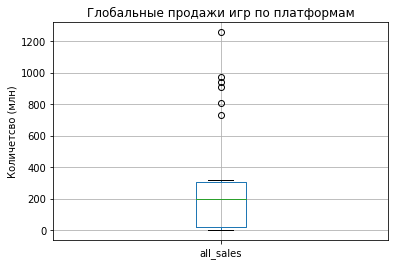

,all_sales
count,31.000000
mean,287.525484
std,348.220029
min,0.030000
25%,22.150000
50%,200.040000
75%,304.095000
max,1255.770000


In [33]:
global_sales_by_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
global_sales_by_platform.boxplot()
plt.title('Глобальные продажи игр по платформам')
plt.ylabel('Количетсво (млн)')
plt.show()
global_sales_by_platform.describe()

Видим основная концентрация продаж от 22млн до 304млн, есть выбросы, но их не много. Медиана у нас 200млн.

In [34]:
df.groupby('platform')['all_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sales, dtype: float64

Если сгурппировать по платформам, то видно, что самые большие продажи игр у платформы PS2. Это самая популярная платформа.

### Глянем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [35]:
top_platform = df.query('platform == "PS2"')

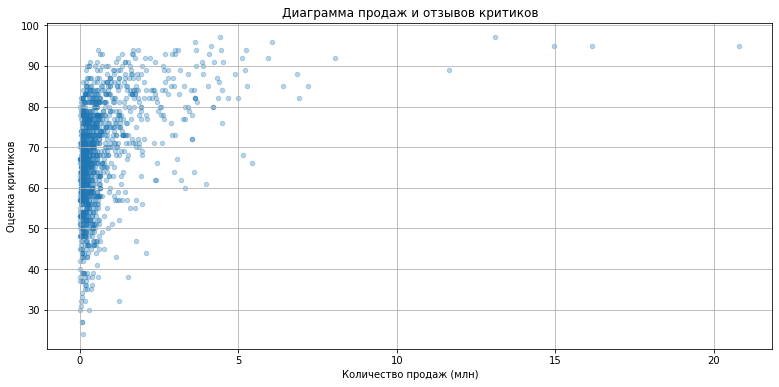

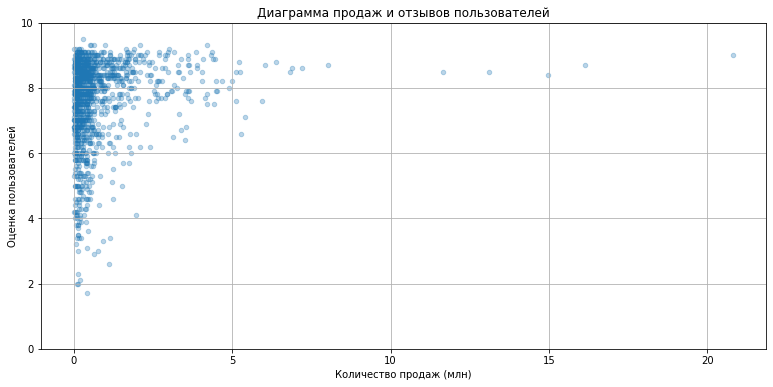

In [36]:
top_platform.plot(x='all_sales',
                  y='critic_score',
                  kind='scatter',
                  figsize=(13, 6),
                  alpha=0.3,
                  grid=True,
                  title=('Диаграмма продаж и отзывов критиков')
                  )
plt.xlabel('Количество продаж (млн)')
plt.ylabel('Оценка критиков')
plt.show()

top_platform.plot(x='all_sales',
                  y='user_score',
                  kind='scatter',
                  figsize=(13, 6),
                  alpha=0.3,
                  ylim=(0, 10),
                  grid=True,
                  title=('Диаграмма продаж и отзывов пользователей')
                  )
plt.xlabel('Количество продаж (млн)')
plt.ylabel('Оценка пользователей')
plt.show()

In [37]:
top_critic_score = top_platform.all_sales.corr(top_platform.critic_score)
top_user_score = top_platform.all_sales.corr(top_platform.user_score)
display(f'Корреляция продаж и отзывов критиков:      {top_critic_score}',
        f'Корреляция продаж и отзывов пользователей: {top_user_score}')

'Корреляция продаж и отзывов критиков:      0.3954345494545487'

'Корреляция продаж и отзывов пользователей: 0.17286551112058213'

Наблюдаем, что с ростом оценки возрастают и продажи игр на этой платформе. Только вот зависимость у них не сильная. Самая большая зависимость продаж это от оценки отзывов критиков, т.к. можно предположить, что его оценка для многих важна, ведь этот человек значет о чем говорит, это его работа. Ему верят, по этому покупают чаще, чем игры на которые поставили оценку пользователи.

### Соотнесем выводы с продажами игр на других платформах.

In [38]:
other_platforms = df.query('platform != "PS2"')

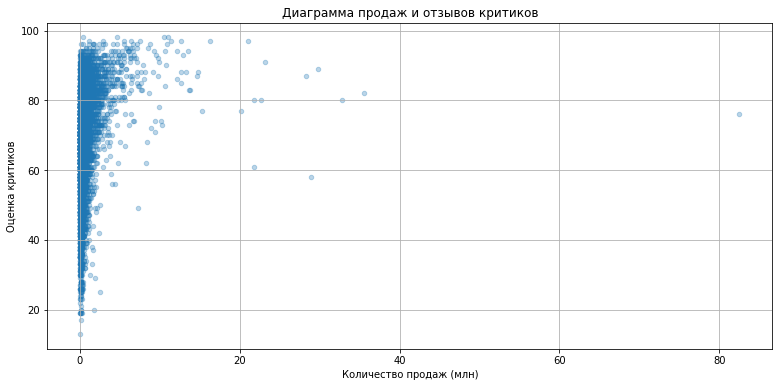

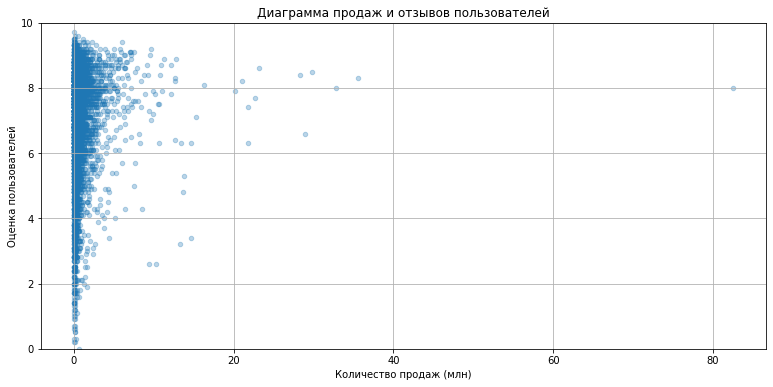

In [39]:
other_platforms.plot(x='all_sales',
                  y='critic_score',
                  kind='scatter',
                  figsize=(13, 6),
                  alpha=0.3,
                  grid=True,
                  title=('Диаграмма продаж и отзывов критиков')
                  )
plt.xlabel('Количество продаж (млн)')
plt.ylabel('Оценка критиков')
plt.show()

other_platforms.plot(x='all_sales',
                  y='user_score',
                  kind='scatter',
                  figsize=(13, 6),
                  alpha=0.3,
                  ylim=(0, 10),
                  grid=True,
                  title=('Диаграмма продаж и отзывов пользователей')
                  )
plt.xlabel('Количество продаж (млн)')
plt.ylabel('Оценка пользователей')
plt.show()

In [40]:
other_critic_score = other_platforms.all_sales.corr(other_platforms.critic_score)
other_user_score = other_platforms.all_sales.corr(other_platforms.user_score)
display(f'Топ платформа    | Корреляция продаж и отзывов критиков: {top_critic_score}',
        f'Другие платформы  | Корреляция продаж и отзывов критиков: {other_critic_score}',
        ' '*100,
        f'Топ платформа    | Корреляция продаж и отзывов пользователей: {top_user_score}',
        f'Другие платформы  | Корреляция продаж и отзывов пользователей: {other_user_score}'
       )

'Топ платформа    | Корреляция продаж и отзывов критиков: 0.3954345494545487'

'Другие платформы  | Корреляция продаж и отзывов критиков: 0.2273821385284529'

'                                                                                                    '

'Топ платформа    | Корреляция продаж и отзывов пользователей: 0.17286551112058213'

'Другие платформы  | Корреляция продаж и отзывов пользователей: 0.07664164557482003'

Сопоставив значения видим, что несмотря на то, что других платформ суммарно больше во всех смыслах, зависимость по отзывам пользователей и критиков меньше почти в 2 раза! Это говорит о том, что PS2 это платформа которая нрав большенству людей и если выходит игра пользоватули готовы их покупать чаще, чем на другие платформы.

### Посмотрим на общее распределение игр по жанрам.

In [41]:
distribution_by_genre = df.pivot_table(index='genre', values='all_sales', aggfunc=['sum', 'count'])
distribution_by_genre.columns = ['sum_genre', 'number_genre']
distribution_by_genre.sort_values('sum_genre', ascending=False, inplace=True)

In [42]:
values = distribution_by_genre.columns
name = ['Суммарные продажи игр (млн)', 'Количество игр (шт)']

data = [ go.Bar(x=distribution_by_genre.index,
                y=distribution_by_genre[values[i]],
                name=name[i]) for i in range(len(values))]

layout = {'title': 'График распределения игр по жанрам',
          'xaxis': {'title': 'Жанры'},
          'yaxis': {'title': 'Количество'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

- Самый прибыльные жанр(больше 1000 млн копий) это экшен, спорт и стелялки. Самый прибыльный -  это экшн, он как боевик, но только ты там главный герой, по этому так и популярно.  
- Затем идут жанры ролевой игры, платформы, аркады и гонки это бы я отнес к среднему заработку.  
- А остальное на любителя исходя по числам продаж судя по графику. Низкие продажи у жанров драк, симуляции, головоломок, приключения и стратегий. Самый низкие продажи по стратегиям.


## Составьте портрет пользователя каждого региона

In [43]:
values = ['na_sales', 'eu_sales', 'jp_sales']

### Глянем на самые популярные платформы (топ-5).

In [44]:
top_saling_platforms = df.pivot_table(index='platform',
                                      values=values,
                                      aggfunc='sum')

In [45]:
top_saling_platforms.na_sales.sort_values(ascending=False).head()

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Топ 5 популярных платформ по продажам в Северной Америке. 

In [46]:
top_saling_platforms.eu_sales.sort_values(ascending=False).head()

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Топ 5 популярных платформ по продажам в Европе. 

In [47]:
top_saling_platforms.jp_sales.sort_values(ascending=False).head()

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Топ 5 популярных платформ по продажам в Японии. 

Видно, что в Америке и Европе люди предпочитают более современные платформы PS2, PS3, X360, Wii, а вот в Японии видимо пользователи любят ретро игры и поэтому больше всего продаж на старых платформах PS, PS2, DS, SNES   
Что по продажам, то больше всего люди покупают в Америке, а разница почти в 2 раза с Европой и в почти в 3 раза с Японией. То же самое можно сказать о разнице Европы и Японии, в Евпропе продаж почти в 2 раза больше чем в Японии.

### Самые популярные жанры (топ-5).

In [48]:
top_geners_platform = df.pivot_table(index='genre', values=values, aggfunc='sum')

In [49]:
top_geners_platform.na_sales.sort_values(ascending=False).head()

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Топ 5 популярных жанров по продажам в Северной Америке.

In [50]:
top_geners_platform.eu_sales.sort_values(ascending=False).head()

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Топ 5 популярных жанров по продажам в Европе.

In [51]:
top_geners_platform.jp_sales.sort_values(ascending=False).head()

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Топ 5 популярных жанров по продажам в Японии.

В Америке больше всего продаж по жанрам, а топ самых попурялных почти похож на топ жанров в Европе. В Японии мы снова видим отличие, если в Америке и Европе первое место это экшен, то в Японии это ролевые-игры, а потом уже экшен. Видимо там совсем другие интересы и вкусы на жанр и платформы игр.
По разнице в продажах примерно также как у платформ. Лидирует Америка, примерно в 2 раза меньше Европа и больше чем в 3 раза Япония.

### Отдельно посмотрим на влияние рейтинга ESRB на продажи в каждом регионе

Выведем ещще раз для наглядности.  
Расшифровка аббревиатур рейтинга ESBR:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [52]:
sales_by_esrb = df.pivot_table(index='rating', values=values, aggfunc='sum')

In [53]:
sales_by_esrb.na_sales.sort_values(ascending=False)

rating
E       1295.55
T        759.75
M        748.48
E10+     353.32
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Продажи игр с рейтингом ESBR в Северной Америке.

In [54]:
sales_by_esrb.eu_sales.sort_values(ascending=False)

rating
E       710.52
M       483.97
T       427.03
E10+    188.52
AO        0.61
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64

Продажи игр с рейтингом ESBR в Европе.

In [55]:
sales_by_esrb.jp_sales.sort_values(ascending=False)

rating
E       199.57
T       151.40
M        64.24
E10+     40.20
RP        0.00
EC        0.00
AO        0.00
Name: jp_sales, dtype: float64

Продажи игр с рейтингом ESBR в Японии.

- В Америке чаще всего продаются игры с рейтингом "Для всех" и почти одинакого продаются игры с рейтингом "Подросткам" и "Взрослым"  
- В Евпропе аналогичная ситуация, только количество продаж меньше почти в 2 раза. Еще в Европе есть продажи игр с рейтингом "Рейтинг игр ожидается", то как в остальных регионах такого нет.
- В Японии как ни странно люди тоже покупают игры с таким же рейтингом как и в других регионах, но совсем нет продаж игр с рейтингом "Для детей младшего возраста" и "Только для взрослых", то как в остальных регионах такие продажи имеются.

Чаще всего рейтинг игр влияет на продажи, т.к. одни и теже игры с рейтингом покупают в разных регионах, есть конечно исключения, но на общем фоне они очень малы.

## Проверка гипотез

Сформируем гипотезу:

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- Нулевая гипотеза - средние ользовательские рейтинги платформ равны.  
- Альтернативная гипотеза - средние пользовательские рейтинги платформ разные.

Используем метод о равенстве средних двух генеральных совокупностей.

In [56]:
xbox_one = df.query('platform == "XOne"').user_score.dropna()
pc = df.query('platform == "PC"').user_score.dropna()

In [57]:
alpha = 0.05

In [58]:
result = st.ttest_ind(xbox_one, pc, equal_var=False)
print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение 4.935072360183565e-06
Отвергаем нулевую гипотезу


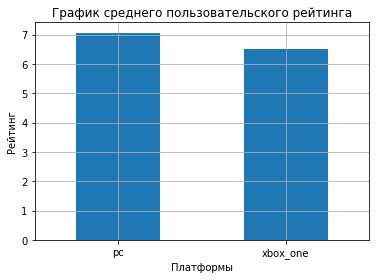

In [59]:
hypothesis0 = df.query('platform == "PC"')[['user_score']].reset_index().join(
                  df.query('platform == "XOne"')[['user_score']].reset_index(),rsuffix='_right')\
                                                                  [['user_score', 'user_score_right']]
hypothesis0.columns = ['pc', 'xbox_one']
hypothesis0.mean().plot.bar(rot=0,
                            title='График среднего пользовательского рейтинга',
                            grid=True
                           )
plt.xlabel('Платформы')
plt.ylabel('Рейтинг')
plt.show()

Мы отвергаем 0 гипотезу и принимаем альтернативную, что пользовательские рейтинги платформ XBox One и PC разные. Мы можем сравнить показания на графике и видно, что они и в правду разные.

Сформируем гипотезу:

### Средние пользовательские рейтинги жанров Action и Sports разные.

- Нулевая гипотеза - cредние пользовательские рейтинги жанров равны.
- Альтернативная гипотеза - cредние пользовательские рейтинги жанров разные.

In [60]:
action = df.query('genre == "Action"').user_score.dropna()
sports = df.query('genre == "Sports"').user_score.dropna()

In [61]:
result = st.ttest_ind(action, sports)
print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение 0.10406951359049141
Не удалось отвергнуть нулевую гипотезу


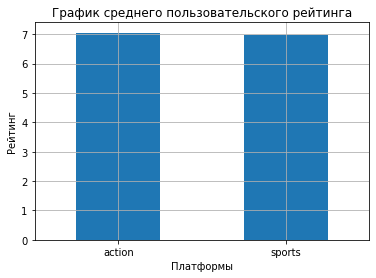

In [62]:
hypothesis1 = df.query('genre == "Action"')[['user_score']].reset_index().join(
                  df.query('genre == "Sports"')[['user_score']].reset_index(), rsuffix='_right')\
                                                                  [['user_score', 'user_score_right']]
hypothesis1.columns = ['action', 'sports']
hypothesis1.mean().plot.bar(rot=0,
                            title='График среднего пользовательского рейтинга',
                            grid=True
                           )
plt.xlabel('Платформы')
plt.ylabel('Рейтинг')
plt.show()

Полученное p-значение говорит, что пользовательский рейтинг из разных жанров одинаков и нам не удалось отвергнуть 0 гипотезу. С вероятностью 10% различия между рейтингами можно получить случайно. Это не такая уж и маленькая вероятность, так что можно сказать, что средний пользовательский рейтинг этих жанров равны.

# Общий вывод:

- Прочитали файл и изучили его.    


- Предобработка данных.

    - Привели колонки к нижнему регистру.
    - Привели столбец "user_score" к нужному типу данных.
    - "tbd" - это рейтинг игр которые еще не анонсированы, заменил их на NaN.
    - Удалил 2 строчки которые не имеют вообще нужной нам инфы, только год написан и продажи, так, что эти строчки бесполезны.
    - Подсчитал суммарные продажи.
    - Заменили рейтинг игр "Е-А" на общепринятный рейтинг после 1998 года "Е" для удобства работы с данными.  
    
    
- Исследовательский анализ.  

    - Посмотрели сколько игр выпускалось в разные года и как менялись продажи по платформам. Характерный период это 9 лет (с 2005 по 2014). В 2005 появляются PS3 и Х360 и начинается рост игр на наших платформах, а в 2014 уже нет платформы DS и платформа Wii уже не такая популярная как в 2009.
    - Взяли актуальный период и узнали какие платформы лидируют по продажам. 
    
        - Лидирует по продажам платформа X360. Актуальные платформы по продажам выделим 3 платформы: Х360, PS3 and Wii. Все остальные платформы не могу сказать растут или падают продажи т.к. это обзор за 2010 год.

        - Данные после 2010. Падение продаж произошло у платформ: Wii, DS, PSP, PS2 Рост платформ: X360, PS3, PC, 3DS

        - Тем самым можно сделать прогноз на на 2017 год. Платформы X360, PS3, PC и 3DS будут определенно расти в продажах игр, а вот на остальные платформы в скором времени прекратят выпускать игры.
        
    - Построили ящик с усами по глобальным продажам для игр по платформам.  
    - Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков и соотнесли результаты с другими платформами.  
    
        - Сопоставив значения видим, что несмотря на то, что других платформ суммарно больше во всех смыслах, зависимость по отзывам пользователей и критиков меньше почти в 2 раза! Это говорит о том, что PS2 это платформа которая нрав большенству людей и если выходит игра пользоватули готовы их покупать чаще, чем на другие платформы.
        
    - Посмотрели на распределение по жанрам.
    
        - Самый прибыльные жанр(больше 1000 млн копий) это экшен, спорт и стелялки. Самый прибыльный -  это экшн, он как боевик, но только ты там главный герой, по этому так и популярно.  
        - Затем идут жанры ролевой игры, платформы, аркады и гонки это бы я отнес к среднему заработку.  
        - А остальное на любителя исходя по числам продаж судя по графику. Низкие продажи у жанров драк, симуляции, головоломок, приключения и стратегий. Самый низкие продажи по стратегиям.


- Составьте портрет пользователя каждого региона.

    - Япония отличается от Северной Америки и Европы как по жанрам так и по платформам. Там совсем другой менталитет.
    
- Проверьте гипотезы.
    
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    
        - Мы отвергли 0 гипотезу и приняли альтернативную.  
        
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
        - Тут нам не удалось отвергнуть 0 гипотезу.
        
- Вывод:
    - На популярность игр влияют много факторов, но основные которые можно выделить из проделанной работы это: платформа, жанр, регион где будет продаваться игра. Так же возрастная категория, она тоже может влиять на популярность игры.